<a href="https://colab.research.google.com/github/j43hyun9/cv/blob/main/%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%84_3_%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/drive')


Mounted at /content/drive


## 3-4

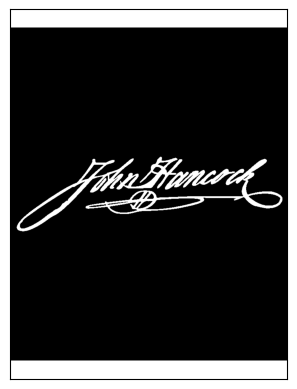

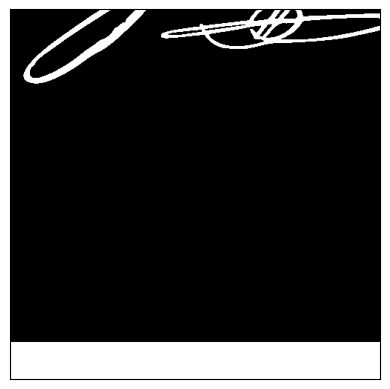

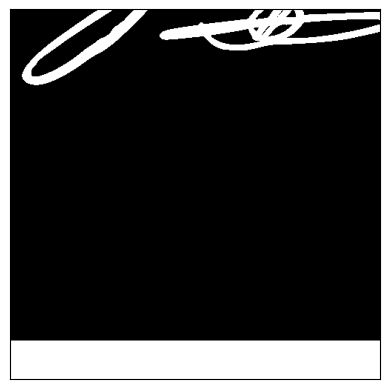

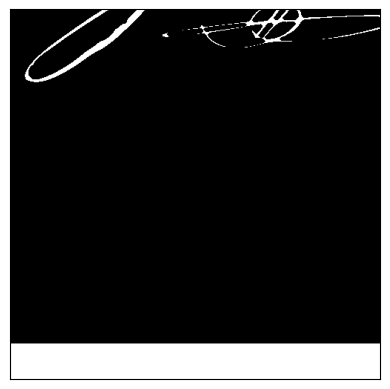

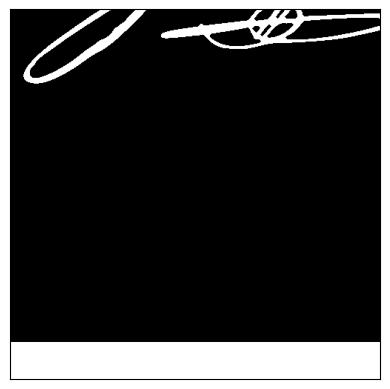

In [4]:
img = cv.imread('/content/drive/MyDrive/3학년1학기 컴퓨터비전 실습/img/john_black.jpg', cv.IMREAD_UNCHANGED)

t, bin_img = cv.threshold(img[:,:], 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.imshow(bin_img, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b=bin_img[bin_img.shape[0]//2:bin_img.shape[0],0:bin_img.shape[0]//2+1]
plt.imshow(b, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show() # 원본

se=np.uint8([[0,0,1,0,0],
             [0,1,1,1,0],
             [1,1,1,1,1],
             [0,1,1,1,0],
             [0,0,1,0,0]])

b_dilation= cv.dilate(b,se, iterations=1)       #팽창
plt.imshow(b_dilation, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b_erosion= cv.erode(b,se, iterations=1)       #침식
plt.imshow(b_erosion, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b_closing= cv.erode(cv.dilate(b, se, iterations=1),se, iterations=1)       #닫기
plt.imshow(b_closing, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

## 3-5

## 감마보정 실험하기

### OpenCV의 GPU 활용
Colab에서 OpenCV의 GPU 기능을 활성화하려면 OpenCV를 CUDA 지원으로 빌드해야 합니다. 아래는 설치 및 설정 단계입니다:

In [8]:
!sudo apt-get update && sudo apt-get install -y build-essential cmake unzip pkg-config \
libjpeg-dev libpng-dev libtiff-dev libavcodec-dev libavformat-dev libswscale-dev \
libv4l-dev libxvidcore-dev libx264-dev libgtk-3-dev libatlas-base-dev gfortran python3-dev


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,383 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [70.9 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,684 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:13 https://ppa.l

In [9]:
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git


Cloning into 'opencv'...
remote: Enumerating objects: 343416, done.
remote: Counting objects: 100% (347/347), done.
remote: Compressing objects: 100% (261/261), done.
remote: Total 343416 (delta 218), reused 86 (delta 86), pack-reused 343069 (from 3)
Receiving objects: 100% (343416/343416), 532.28 MiB | 22.60 MiB/s, done.
Resolving deltas: 100% (239584/239584), done.
Updating files: 100% (7612/7612), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 43344, done.
remote: Counting objects: 100% (4085/4085), done.
remote: Compressing objects: 100% (1457/1457), done.
remote: Total 43344 (delta 2994), reused 2629 (delta 2628), pack-reused 39259 (from 4)
Receiving objects: 100% (43344/43344), 152.27 MiB | 22.64 MiB/s, done.
Resolving deltas: 100% (26709/26709), done.


In [10]:
!mkdir /content/build
%cd /content/build

!cmake -DOPENCV_EXTRA_MODULES_PATH=/content/opencv_contrib/modules \
-DWITH_CUDA=ON -DWITH_CUBLAS=ON -DWITH_CUDNN=ON -DOPENCV_DNN_CUDA=ON \
-DBUILD_SHARED_LIBS=OFF -DBUILD_TESTS=OFF -DBUILD_PERF_TESTS=OFF \
-DPYTHON_EXECUTABLE=$(which python3) /content/opencv


/content/build
CMake Deprecation Warning at CMakeLists.txt:25 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


-- 'Release' build type is used by default. Use CMAKE_BUILD_TYPE to specify build type (Release or Debug)
-- The CXX compiler identification is GNU 11.4.0
-- The C compiler identification is GNU 11.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- 

In [11]:
!make -j$(nproc)
!make install


[  0%] Built target opencv_highgui_plugins
[  0%] Built target opencv_dnn_plugins
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_core.c.o
[  0%] Built target opencv_videoio_plugins
[  0%] Building C object 3rdparty/ittnotify/CMakeFiles/ittnotify.dir/src/ittnotify/ittnotify_static.c.o
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image.c.o
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image_color_convert_all.c.o
[  1%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image_color_convert_rgbs.c.o
[  1%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image_filter_bilateral.c.o
[  1%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image_filter_box.c.o
[  1%] Building C object 3rdparty/ittnotify/CMakeFiles/ittnotify.dir/src/ittnotify/jitprofiling.c.o
[  1%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image_filter_canny.c.o
[  1%] Linking C static library ../lib/libittnot

In [ ]:
import cv2

print(cv2.__version__)
print(cv2.cuda.getCudaEnabledDeviceCount())  # GPU가 활성화되었는지 확인 (1 이상이면 성공)


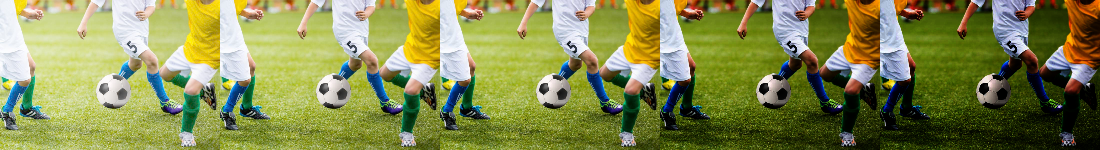

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv.imread('/content/drive/MyDrive/3학년1학기 컴퓨터비전 실습/img/soccer.jpg')
img = cv.resize(img, dsize=(0,0), fx=0.25, fy=0.25)

def gamma(f, gamma=1.0):
  f1=f/255.0
  return np.uint8(255*(f1**gamma))

gc= np.hstack((gamma(img, 0.5), gamma(img, 0.75), gamma(img, 1.0), gamma(img, 2.0), gamma(img, 3.0)))

cv2_imshow(gc)
# cv2_waitKey(0)
# cv.destroyAllWindows()

## 히스토그램 평활화

### 히스토그램이 평평하게 되도록 영상을 조작해 영상의 명암 대비를 높이는 기법

In [17]:
import cv2 as cv
import matplotlib.pyplot as plt

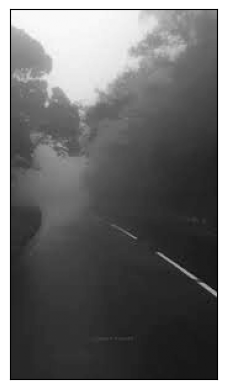

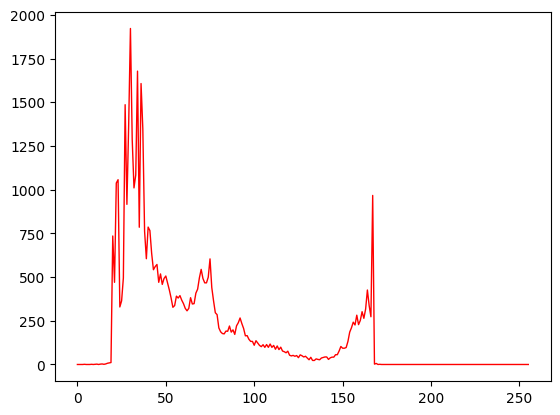

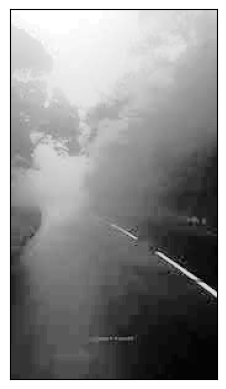

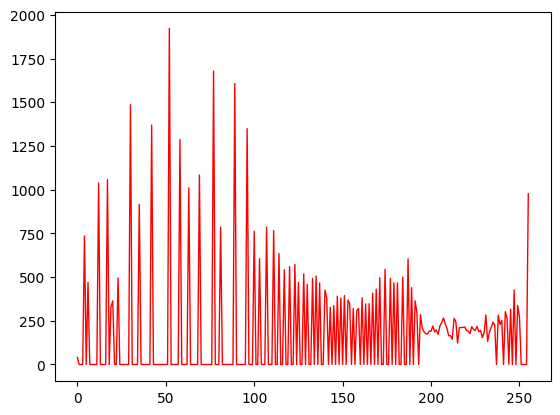

([<matplotlib.lines.Line2D at 0x7f2ffd1a6f10>], None)

In [24]:
img = cv.imread('/content/drive/MyDrive/3학년1학기 컴퓨터비전 실습/img/mistyroad.jpg')
if img is None:
    print("Image not loaded. Check the file path.")

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)     # 명암 영상으로 변환하고 출력
plt.imshow(gray, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

h = cv.calcHist([gray],[0],None,[256],[0,256]) # 히스토그램을 구해 출력
plt.plot(h, color='r', linewidth=1),plt.show()

equal=cv.equalizeHist(gray)
plt.imshow(equal, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

he=cv.calcHist([equal],[0],None,[256],[0,256])
plt.plot(he, color='r', linewidth=1),plt.show()

## 3-7 컨볼루션 적용(가우시안 스무딩과 엠보싱)하기